# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [49]:
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split

df = pd.read_csv('housing.csv')
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [52]:
# Verificar tipos de dados
print(df.dtypes)

# Tratar valores ausentes
print(df.isnull().sum())
df.ffill(inplace=True)  # Preencher valores ausentes

# Codificar variáveis categóricas
df = pd.get_dummies(df, drop_first=True)

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

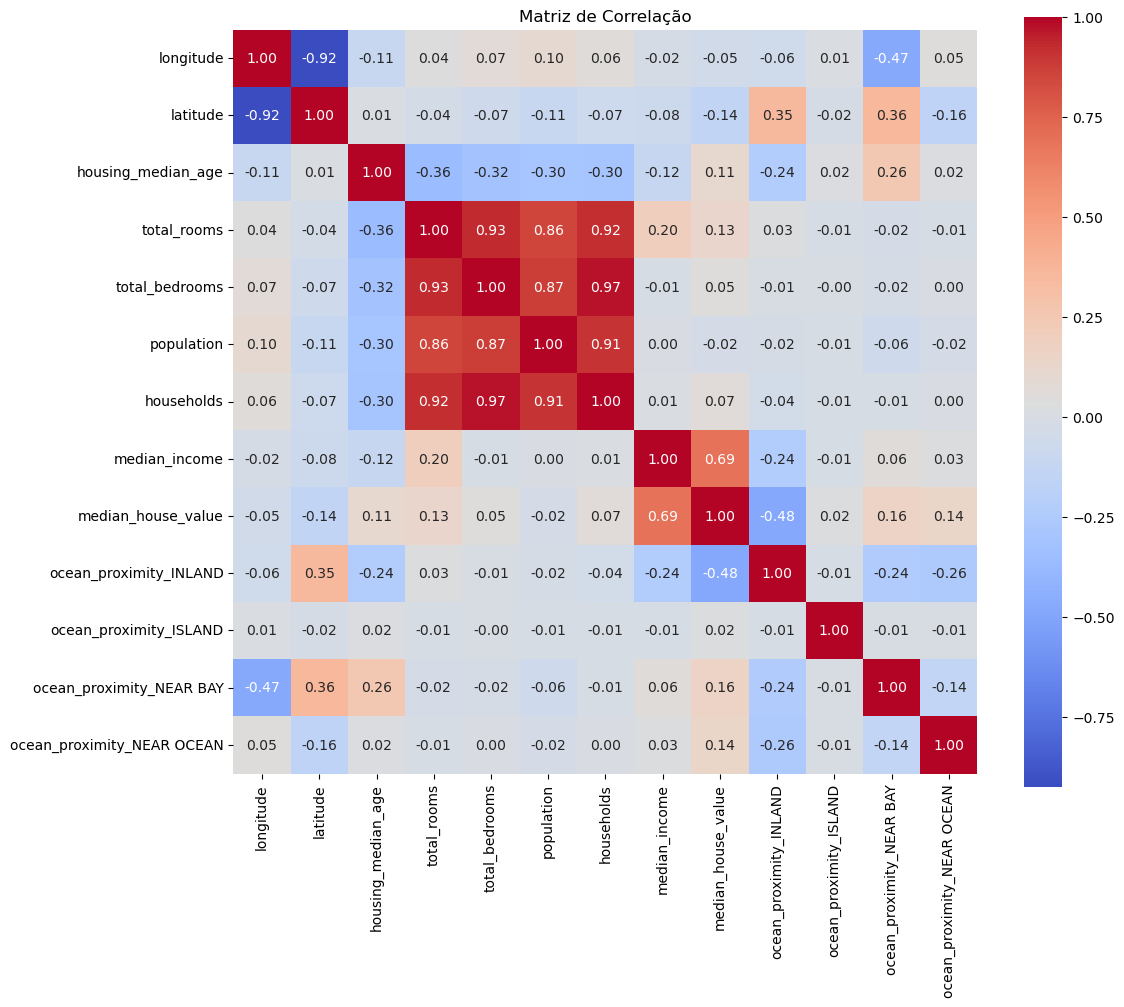

In [55]:
import matplotlib.pyplot as plt

# Calcular a matriz de correlação
correlation_matrix = df.corr()

# Configurar o tamanho do gráfico
plt.figure(figsize=(12, 10))

# Criar o heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)

# Adicionar título
plt.title('Matriz de Correlação')
plt.show()

### 3. Separe os dados em validação e teste

In [58]:
# Separar recursos e target
X = df.drop('median_house_value', axis=1)  # Variáveis independentes
y = df['median_house_value']  # Variável dependente

# Primeiro, dividir em conjunto de treinamento e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Em seguida, dividir o conjunto de treinamento em treinamento e validação (80% treino, 20% validação)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Exibir as formas dos conjuntos
print(f'Treinamento: {X_train.shape}, Validação: {X_val.shape}, Teste: {X_test.shape}')

Treinamento: (13209, 12), Validação: (3303, 12), Teste: (4128, 12)


### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [60]:
# Treinar a árvore com profundidade máxima = 8
tree_depth_8 = DecisionTreeRegressor(max_depth=8, random_state=42)
tree_depth_8.fit(X_train, y_train)

# Treinar a árvore com profundidade máxima = 2
tree_depth_2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_depth_2.fit(X_train, y_train)

# Fazer previsões no conjunto de validação
y_val_pred_8 = tree_depth_8.predict(X_val)
y_val_pred_2 = tree_depth_2.predict(X_val)

# Avaliar o desempenho usando o erro quadrático médio
mse_8 = mean_squared_error(y_val, y_val_pred_8)
mse_2 = mean_squared_error(y_val, y_val_pred_2)

# Exibir os resultados
print(f'MSE da árvore com profundidade 8: {mse_8:.2f}')
print(f'MSE da árvore com profundidade 2: {mse_2:.2f}')


MSE da árvore com profundidade 8: 4234131176.92
MSE da árvore com profundidade 2: 6917005141.73


### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [47]:
# Fazer previsões nos conjuntos de treinamento e teste
y_train_pred_8 = tree_depth_8.predict(X_train)
y_test_pred_8 = tree_depth_8.predict(X_test)

y_train_pred_2 = tree_depth_2.predict(X_train)
y_test_pred_2 = tree_depth_2.predict(X_test)

# Avaliar o desempenho usando o erro quadrático médio
mse_train_8 = mean_squared_error(y_train, y_train_pred_8)
mse_test_8 = mean_squared_error(y_test, y_test_pred_8)

mse_train_2 = mean_squared_error(y_train, y_train_pred_2)
mse_test_2 = mean_squared_error(y_test, y_test_pred_2)

# Exibir os resultados
print(f'MSE da árvore com profundidade 8 (treinamento): {mse_train_8:.2f}')
print(f'MSE da árvore com profundidade 8 (teste): {mse_test_8:.2f}')
print(f'MSE da árvore com profundidade 2 (treinamento): {mse_train_2:.2f}')
print(f'MSE da árvore com profundidade 2 (teste): {mse_test_2:.2f}')

MSE da árvore com profundidade 8 (treinamento): 3104583522.48
MSE da árvore com profundidade 8 (teste): 4123505489.15
MSE da árvore com profundidade 2 (treinamento): 6651703412.70
MSE da árvore com profundidade 2 (teste): 6896665957.30


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

A árvore com profundidade 8 parece ser a mais adequada com base nos resultados. Ela apresenta um desempenho superior tanto no conjunto de treinamento quanto no conjunto de teste, com MSEs menores, indicando que ela está capturando melhor a relação entre as variáveis do conjunto de dados.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

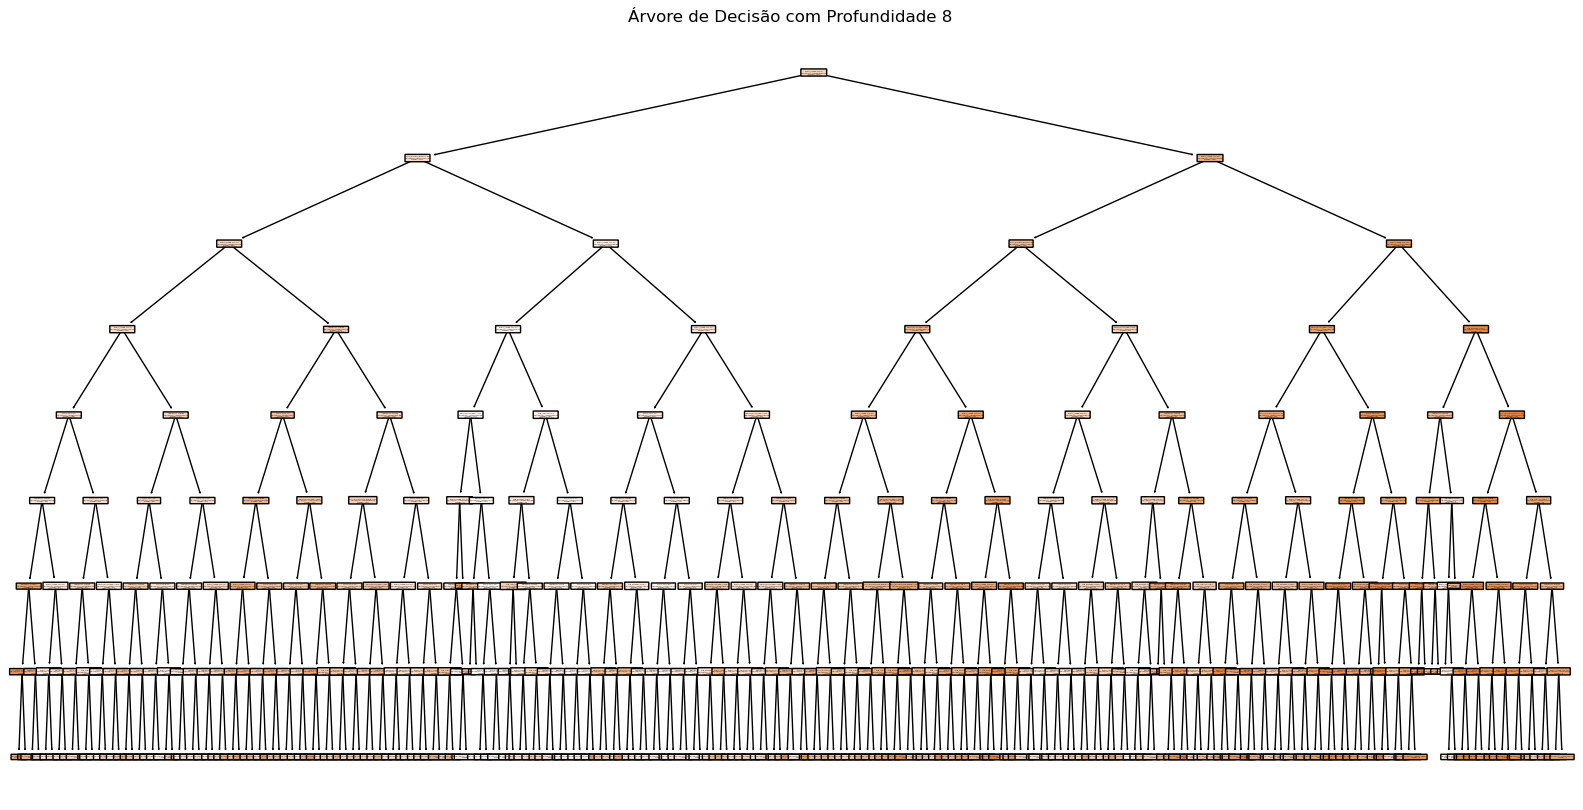

In [70]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualizar a árvore com profundidade 8
plt.figure(figsize=(20, 10))
plot_tree(tree_depth_8, filled=True, feature_names=X.columns, rounded=True)
plt.title("Árvore de Decisão com Profundidade 8")
plt.show()


In [77]:
regr_1 = DecisionTreeRegressor (max_depth=3, min_samples_leaf=10)
regr_1.fit(X_train, y_train)
mse1 = regr_1.score(X_test, y_test)
mse1

0.5476410818456143

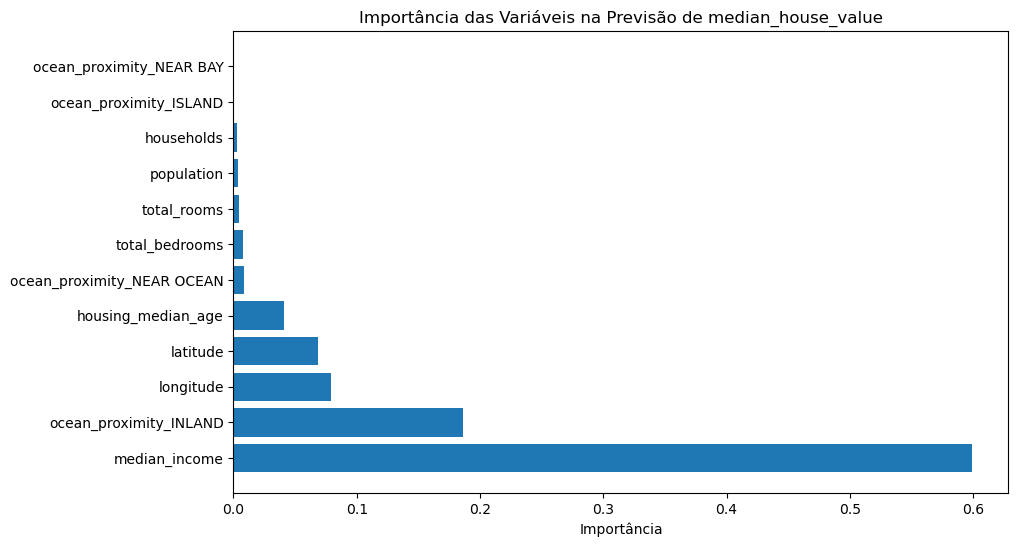

In [69]:
# Importar bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

# Calcular a importância das variáveis
importances = tree_depth_8.feature_importances_

# Criar um DataFrame para visualizar as importâncias
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Visualizar as importâncias
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importância')
plt.title('Importância das Variáveis na Previsão de median_house_value')
plt.show()


As variáveis housing median age, latitude, longitude, ocean proximity inland e median income são as variáveis que parecem ter mais importância